In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("input.csv")

In [3]:
df.head()

,cap-diameter,stem-height,stem-width,date,cap-shape,cap-color,has-ring,ring-type,class
0,5.35,5.65,4.60,2020.04.01,x,g,t,l,e
1,6.62,5.61,7.08,2020.04.11,b,n,t,NaN,p
2,4.96,4.99,6.59,2020.06.18,x,e,f,f,p
3,NaN,4.17,2.62,2020.02.05,b,w,f,f,e
4,6.99,8.80,10.11,2020.09.04,x,e,t,z,p


In [4]:
#THE DATA NEEDS TO BE CLEANED BECAUSE OF BAD RECORDS
df.isnull().sum()

cap-diameter       1
stem-height        0
stem-width         0
date               0
cap-shape          0
cap-color          0
has-ring           0
ring-type       1590
class              0
dtype: int64

In [5]:
df.describe()

,cap-diameter,stem-height,stem-width
count,39083.000000,39084.000000,39084.000000
mean,6.766402,6.584132,12.171905
std,5.369076,3.362664,10.022469
min,0.440000,0.000000,0.000000
25%,3.490000,4.640000,5.240000
50%,5.880000,5.950000,10.235000
75%,8.540000,7.740000,16.610000
max,62.340000,33.920000,102.480000


In [6]:
#THERE ARE RECORDS WHICH HAVE INCORRECT ring-type
df[df["ring-type"].isnull()]

,cap-diameter,stem-height,stem-width,date,cap-shape,cap-color,has-ring,ring-type,class
1,6.62,5.61,7.08,2020.04.11,b,n,t,NaN,p
10,6.49,6.00,6.11,2020.10.28,f,n,t,NaN,p
32,9.73,7.40,14.62,2020.10.06,x,y,t,NaN,e
124,7.91,6.93,14.25,2020.08.20,x,y,t,NaN,e
127,14.47,9.04,15.43,2020.10.20,x,n,t,NaN,e
...,...,...,...,...,...,...,...,...,...
38942,4.34,10.99,6.01,2020.09.24,b,n,t,NaN,p
39027,15.50,10.03,18.45,2020.11.14,x,n,t,NaN,e
39067,8.65,7.33,14.88,2020.05.24,x,y,t,NaN,e
39080,9.79,8.74,12.96,2020.02.29,x,n,t,NaN,e


In [7]:
df.at[3, "cap-diameter"] = df["cap-diameter"].mean()

In [8]:
#REMOVING RECORDS WITH INCORRECT ring-type
df = df.dropna( subset = ["ring-type"])

In [9]:
df.head()

,cap-diameter,stem-height,stem-width,date,cap-shape,cap-color,has-ring,ring-type,class
0,5.350000,5.65,4.60,2020.04.01,x,g,t,l,e
2,4.960000,4.99,6.59,2020.06.18,x,e,f,f,p
3,6.766402,4.17,2.62,2020.02.05,b,w,f,f,e
4,6.990000,8.80,10.11,2020.09.04,x,e,t,z,p
5,5.180000,3.79,12.47,2020.01.24,f,u,f,f,e


In [10]:
#CONVERTING THE NON-NUMERIC DATA INTO NUMERIC
#df["cap-diameter"] = pd.to_numeric(df["cap-diameter"], errors="coerce")
#df["cap-color"] = pd.to_numeric(df["cap-color"], errors="coerce")
#df["has-ring"] = pd.to_numeric(df["has-ring"], errors="coerce")
#df["ring-type"] = pd.to_numeric(df["ring-type"], errors="coerce")

In [11]:
#enc = preprocessing.OrdinalEncoder()
#encoded = enc.fit_transform(df[["cap-shape"]])
#encoded = enc.fit_transform(df[["cap-diameter"]])
#encoded = enc.fit_transform(df[["cap-color"]])
#encoded = enc.fit_transform(df[["has-ring"]])
#encoded = enc.fit_transform(df[["ring-type"]]) 

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder_cap_shape = LabelEncoder()
label_encoder_cap_color = LabelEncoder()
label_encoder_has_ring = LabelEncoder()
label_encoder_ring_type = LabelEncoder()
label_encoder_class = LabelEncoder()

# Fit and transform each column separately
df["cap-shape"] = label_encoder_cap_shape.fit_transform(df["cap-shape"])
df["cap-color"] = label_encoder_cap_color.fit_transform(df["cap-color"])
df["has-ring"] = label_encoder_has_ring.fit_transform(df["has-ring"])
df["ring-type"] = label_encoder_ring_type.fit_transform(df["ring-type"])
df["class"] = label_encoder_class.fit_transform(df["class"])

In [13]:
df.head()

,cap-diameter,stem-height,stem-width,date,cap-shape,cap-color,has-ring,ring-type,class
0,5.350000,5.65,4.60,2020.04.01,6,2,1,3,0
2,4.960000,4.99,6.59,2020.06.18,6,1,0,1,1
3,6.766402,4.17,2.62,2020.02.05,0,10,0,1,0
4,6.990000,8.80,10.11,2020.09.04,6,1,1,7,1
5,5.180000,3.79,12.47,2020.01.24,2,9,0,1,0


In [14]:
df['has-ring'] = df['has-ring'].map({'t': 1, 'f': 0}).fillna(-1)  # Assign -1 for missing values

#cap_color_mapping = {val: idx for idx, val in enumerate(df['cap-color'].unique())}
#df['cap-color'] = df['cap-color'].map(cap_color_mapping)

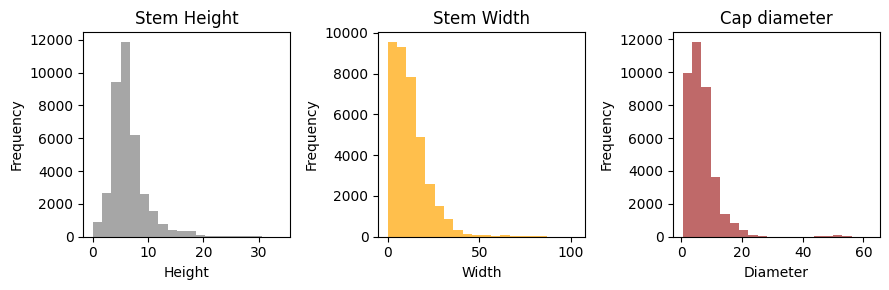

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

axes[0].hist(df["stem-height"], bins=20, color='grey', alpha=0.7)
axes[0].set_title("Stem Height")
axes[0].set_xlabel("Height")
axes[0].set_ylabel("Frequency")

axes[1].hist(df["stem-width"], bins=20, color='orange', alpha=0.7)
axes[1].set_title("Stem Width")
axes[1].set_xlabel("Width")
axes[1].set_ylabel("Frequency")

axes[2].hist(df["cap-diameter"], bins=20, color='brown', alpha=0.7)
axes[2].set_title("Cap diameter")
axes[2].set_xlabel("Diameter")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [16]:
filtered_df = df[df["ring-type"] != 4]

In [20]:
#NEED TO CONVERT STRING COLUMNS INTO NUMERIC
#features = ["cap-diameter", "stem-height", "stem-width", "cap-shape", "cap-color", "has-ring", "ring-type"]
features = ["cap-diameter", "stem-height", "stem-width", "cap-shape", "cap-color", "has-ring", "ring-type"]
label = "class"

feat_data = df[features].copy()
test_data = df[label].copy()

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( feat_data, test_data, test_size=0.2, random_state=42)

In [31]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

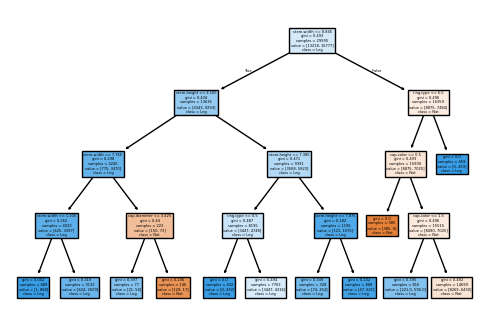

In [32]:
from sklearn import tree

fig = plt.figure( figsize = (6,4))
_ = tree.plot_tree(clf, feature_names=features, class_names=['Not', 'Leg'], filled=True)

In [33]:
from sklearn import metrics

predict = clf.predict(x_test)
print(metrics.accuracy_score(y_test.values, predict))

0.6186158154420589


In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, x_train, y_train, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.61820607 0.62854285 0.63133333 0.63333333 0.6342114  0.63533333
 0.63754585 0.64521507 0.648      0.657     ]
0.6368721240413471


<Axes: xlabel='ring-type', ylabel='class'>

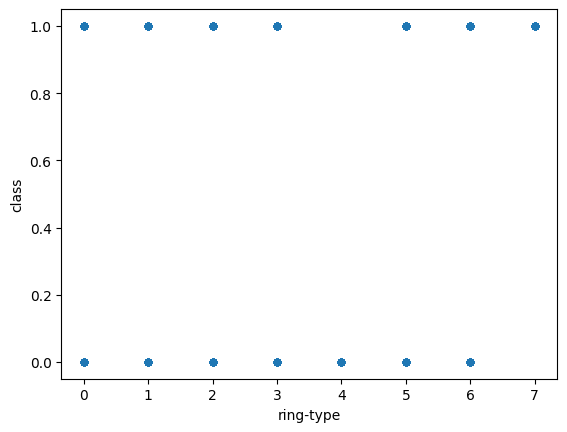

In [53]:
df.plot(kind="scatter", x="ring-type", y="class")

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
scores = cross_val_score(rfc, x_train, y_train, cv=10)

# Sort the cross-validation scores and calculate the mean accuracy
scores.sort()
accuracy = scores.mean()

# Print the cross-validation scores and the mean accuracy
print("Cross-validation scores:", scores)
print("Mean accuracy:", accuracy)

# Now fit the model on the entire training set
rfc.fit(x_train, y_train)

# Make predictions on the test set
predictions = rfc.predict(x_test)

# Save the predictions to a text file
np.savetxt('pred.txt', predictions, fmt='%s')

print("Predictions saved to 'pred.txt'")

Cross-validation scores: [0.94364788 0.945      0.94631544 0.949      0.94966667 0.95031677
 0.95231744 0.95366667 0.956      0.95698566]
Mean accuracy: 0.9502916527731466
Predictions saved to 'pred.txt'
